RATHLAVATH RAKESH  
20K45A0222

# import libraries

In [1]:
import numpy as np
import math as mt
import random
import pandas as pd
import matplotlib.pyplot as plt

# load data


In [2]:
data = pd.read_csv("slr09 (2).csv")
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [3]:
X = data['X'].values
y = data['Y'].values

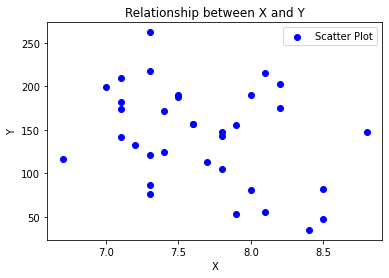

In [4]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=1)
plt.show()


In [5]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# data split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Training

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [8]:
m = lm.coef_
c = lm.intercept_,
print("Estimated model slope, m:" , m)
print("Estimated model intercept, c:" , c)

Estimated model slope, m: [[-20.66754967]]
Estimated model intercept, c: (array([301.00370861]),)


# Model prediction with training and testing data

In [9]:
y_pred_train=lm.predict(X_train)
y_pred_test=lm.predict(X_test)

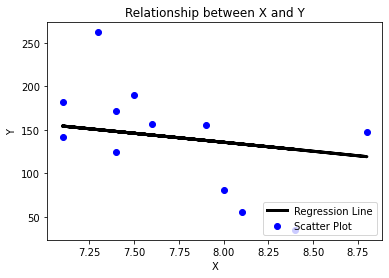

In [10]:
plt.scatter(X_test, y_test, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred_test, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=4)
plt.show()


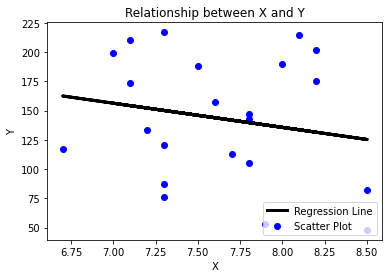

In [11]:
plt.scatter(X_train, y_train, color = 'blue', label='Scatter Plot')
plt.plot(X_train, y_pred_train, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=4)
plt.show()

# Error matrics

In [12]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 51.377181103186
Mean square error 2639.614738109572
Mean absolute error 45.4699819385912


In [13]:
#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 54.17636201481941
Mean square error 2935.0782011607675
Mean absolute error 43.72823399558498


In [14]:
# Checking for Overfitting or Underfitting the data

print("Training set score:",lm.score(X_train,y_train))

print("Test set score:",lm.score(X_test,y_test))

Training set score: 0.0364829290100116
Test set score: 0.16968793213886402


# save model for Deployment

In [15]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(lm, open(filename, 'wb'))

# Deployment

In [16]:
user_ip=input('enter ph level ')
adv=np.array(float(user_ip))
adv=adv.reshape(-1,1)
sales=lm.predict(adv)
print('ph level',float(user_ip))
print('Bicarbonates',sales)

ph level 11.0
Bicarbonates [[73.66066225]]


In [17]:
model = pickle.load(open('model.pkl', 'rb'))
user_ip=input('enter ph level ')
adv=np.array(float(user_ip))
adv=adv.reshape(-1,1)
prediction = model.predict(adv)
result = prediction[0]
print('ph level',float(user_ip))
print('Bicarbonates',result)

ph level 11.0
Bicarbonates [73.66066225]
